In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance
from scipy.cluster import hierarchy


In [16]:
europe=pd.read_csv("dane/data_europe.csv",sep=";",index_col="Country",decimal=",")

Index(['AREA', 'POPTL', 'POPGR', 'POPDN', 'LIFEXP', 'FERTR', 'MRTCH', 'SCHCNT',
       'URBGR', 'GDPGR', 'INFLT', 'GNIPK', 'GDPTL', 'TAXTL', 'AGRVL', 'INDVL',
       'SRVVL', 'ENGRU', 'MOBIL'],
      dtype='object')

In [17]:
europe.describe()

,AREA,POPTL,POPGR,POPDN,LIFEXP,FERTR,MRTCH,SCHCNT,URBGR,GDPGR,INFLT,GNIPK,GDPTL,TAXTL,AGRVL,INDVL,SRVVL,ENGRU,MOBIL
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,5.913795e+05,1.896899e+07,0.146154,114.471795,78.576923,1.569231,5.474359,108.976923,0.412821,1.774359,2.189744,30193.076923,5.684907e+11,19.635897,4.600000,26.143590,69.251282,3405.566667,123.302564
std,2.717791e+06,2.947695e+07,0.699190,99.035972,3.739298,0.198884,3.286393,16.855305,0.751202,2.325909,4.089640,25016.747985,9.387167e+11,6.466940,4.625558,6.735288,8.180493,2769.450673,18.492537
min,2.590000e+03,3.273860e+05,-1.100000,3.300000,70.700000,1.200000,2.000000,78.600000,-1.000000,-6.600000,-1.800000,2560.000000,4.587929e+09,1.300000,0.300000,10.700000,51.700000,808.500000,91.300000
25%,4.223100e+04,3.244382e+06,-0.350000,56.650000,75.550000,1.450000,3.600000,99.250000,-0.100000,0.900000,0.500000,11375.000000,4.637803e+10,17.000000,1.650000,22.250000,63.850000,2150.350000,108.550000
50%,8.387900e+04,7.223938e+06,0.100000,92.900000,80.100000,1.500000,4.400000,106.500000,0.400000,1.800000,1.000000,21260.000000,1.994935e+11,19.900000,2.900000,26.300000,69.200000,2765.600000,118.100000
75%,2.724750e+05,1.403703e+07,0.500000,124.400000,81.450000,1.700000,6.050000,114.000000,0.850000,2.950000,1.800000,47360.000000,5.384513e+11,23.500000,5.300000,30.450000,74.350000,3847.300000,138.200000
max,1.709825e+07,1.438197e+08,2.400000,500.600000,83.200000,2.000000,16.100000,164.800000,2.700000,8.500000,18.100000,104860.000000,3.879277e+12,36.900000,22.900000,40.100000,87.200000,17916.100000,163.000000


AREA	Total Area
POPTL	Total Population
POPGR	Population Grow
POPDN	Population Density
LIFEXP	Life Expectation
FERTR	Fertility Rate
MRTCH	Child mortality
SCHCNT	School Continuation
URBGR	Urban Population Grow
GDPGR	GDP Grow
INFLT	Infation
GNIPK	Gross National Income per Capita
GDPTL	Gross Domestic Product Total
TAXTL	Tax rate
AGRVL	Agricuture Revenue
INDVL	Industrial Revenue
SRVVL	Services Revenue
ENGRU	Energy Use per Capita
MOBIL	Mobile phones


In [56]:
from scipy.stats import zscore
scaled = europe.apply(zscore)

Distances: "cityblock","euclidean","canberra","braycurtis","correlation"
Linkages: "complete","single","average","ward"

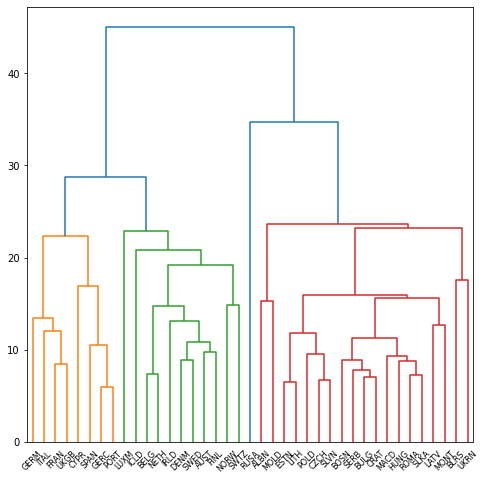

In [54]:
d = distance.pdist(scaled,"cityblock")
l = hierarchy.linkage(d,"complete")
fig,ax = plt.subplots(figsize=(8,8))
_ = hierarchy.dendrogram(l,ax=ax,labels=europe.index,color_threshold=25)
